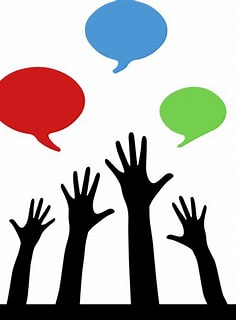

## GRIP Jan'23 Task - Prediction using Decision Tree Algorithm
## Data Science and Business Analytics Domain 
## Creation of Decision Tree classifier and visualizing it graphically
## Mythili Subramanian

### Task:
Create the Decision Tree Classifier and visualizing it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

We would be using Python and its libraries Pandas, Numpy, #Machine Learning libraries - Scikit Learn # visualization libraries- Matplotlib and Seaborn

### Importing the relevant libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

### Iris Dataset being read to be loaded into DataFrame 

In [ ]:
iris = pd.read_csv('/Iris.csv')

In [ ]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Checking the size of DataFrame

In [ ]:
iris.shape

(150, 6)

##### DataFrame has 150 rows and 6 columns

### Displaying top 5 rows

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Displaying last 5 rows

In [ ]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Deriving the statistical summary of DataFrame

In [ ]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


###### Observations: 
1) Average Sepal Length is 5.84 cm

2) Average Sepal Width is 3.054 cm

3) Average Petal Length is 3.75 cm

4) Average Petal Width is 1.198 cm

In [ ]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

###### There are no null values in the dataset

### Plotting Sepal and Petal Dimensions for each species using Scatter Plot

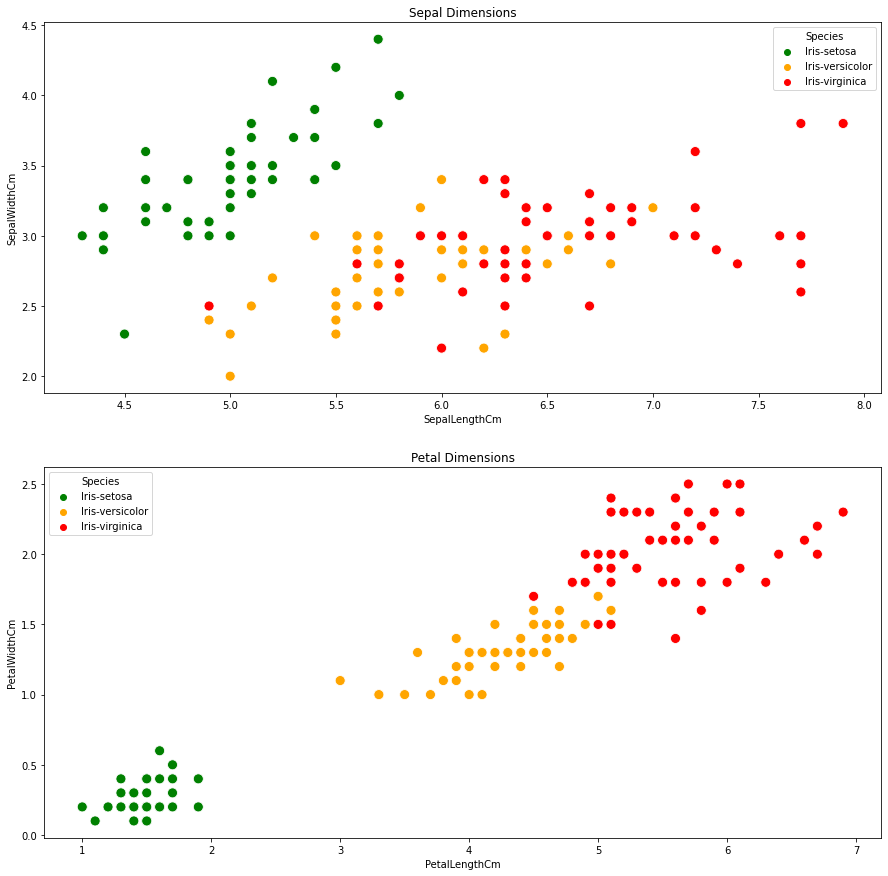

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title('Sepal Dimensions')
sns.scatterplot(x=iris['SepalLengthCm'], y=iris['SepalWidthCm'], hue=iris['Species'], palette=['green', 'orange', 'red'], s=100)

plt.subplot(2,1,2)
plt.title('Petal Dimensions')
sns.scatterplot(x=iris['PetalLengthCm'], y=iris['PetalWidthCm'], hue=iris['Species'], palette=['green', 'orange', 'red'], s=100)

plt.show()

###### Observations:

Sepal Dimensions scatter plot:
1)	Sepal width is more for Iris-setosa species as compared to other 2 species.

2)	Sepal length is more for Iris-virginica species as compared to other 2 species.

3)	Iris-versicolor data points cluster in-between the other 2 species (centre area of the graph)

Petal Dimensions scatter plot:
1)	Iris-setosa species has lower Petal dimensions as compared to other 2 species.

2)	Iris-virginica species has larger Petal dimensions as compared to other 2 species.

3)	Iris-versicolor data points cluster in-between the other 2 species (centre area of the graph)


### Plotting Sepal and Petal Dimensions for each species using Box Plot

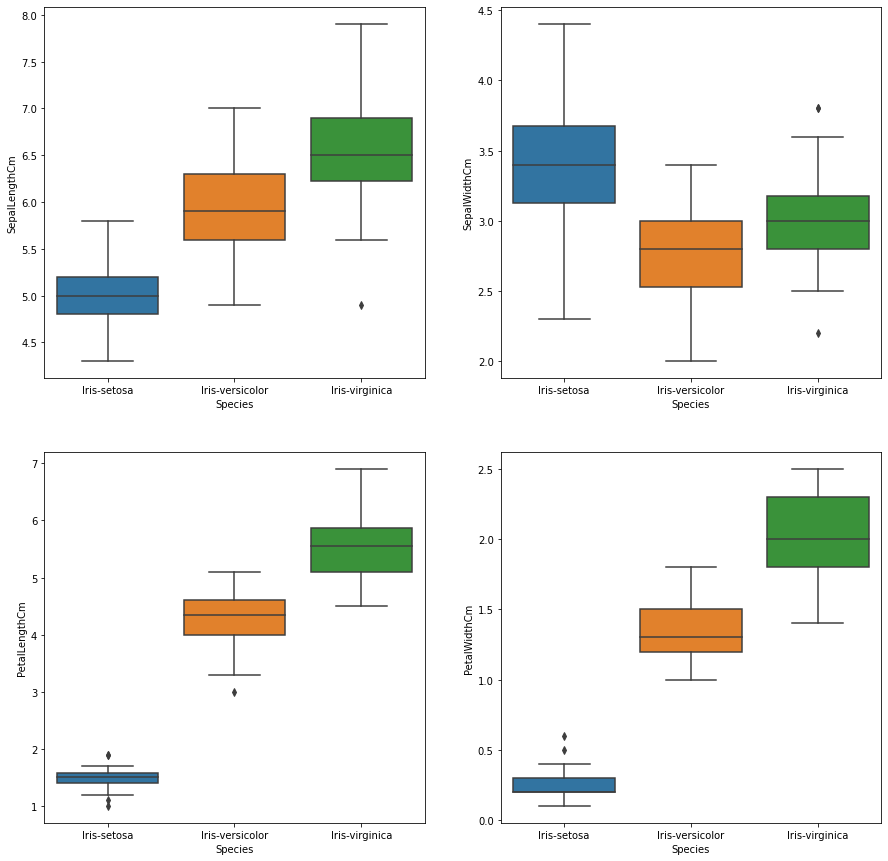

In [ ]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.boxplot(x=iris['Species'], y=iris['SepalLengthCm'])

plt.subplot(2,2,2)
sns.boxplot(x=iris['Species'], y=iris['SepalWidthCm'])

plt.subplot(2,2,3)
sns.boxplot(x=iris['Species'], y=iris['PetalLengthCm'])

plt.subplot(2,2,4)
sns.boxplot(x=iris['Species'], y=iris['PetalWidthCm'])

plt.show()

###### Observations:
1)	There is one outlier in Sepal Length boxplot for Iris-virginica species, but its positive.

2)	There are 2 outliers in Sepal Width boxplot for Iris-virginica species, both positive.

3)	There are few outliers in Petal Length boxplot for both Iris-setosa and Iris-versicolor species, however, they are positive.

4)	There are few outliers in Petal Width boxplot for Iris-setosa species only, however, they are positive.


### Analyzing Sepal and Petal Dimensions Distribution using Histogram

(array([65., 85.]), array([0.  , 1.25, 2.5 ]), <a list of 2 Patch objects>)

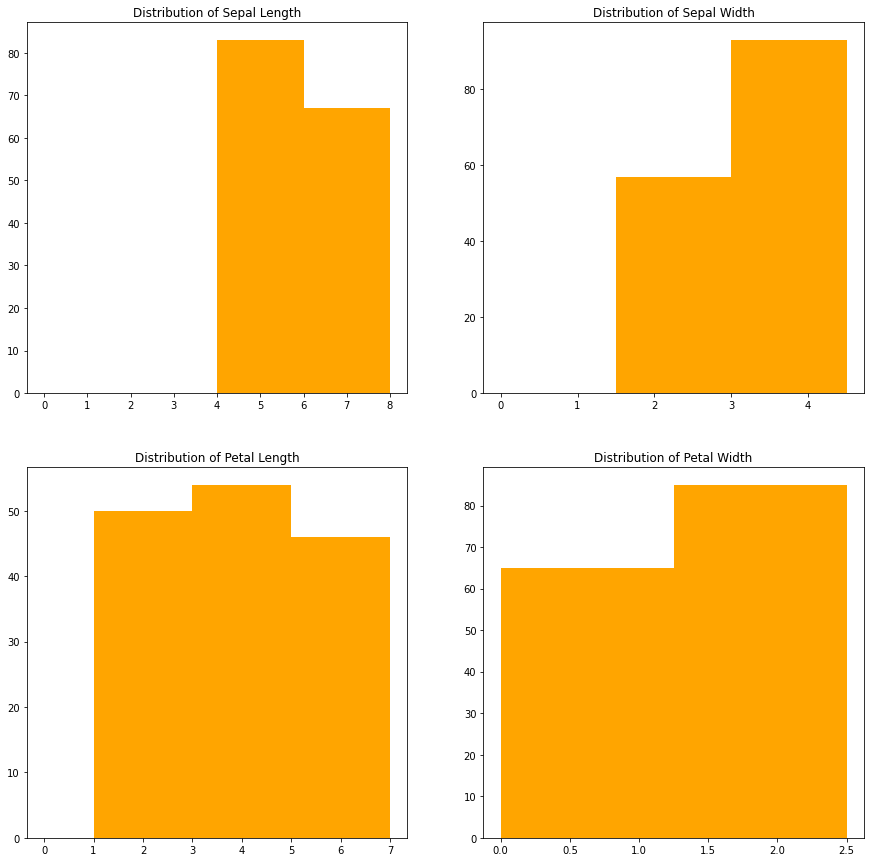

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,15))

axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(iris['SepalLengthCm'], bins = [0,2,4,6,8], color='Orange')

axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(iris['SepalWidthCm'], bins = [0,1.5,3,4.5], color='Orange')

axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(iris['PetalLengthCm'], bins = [0,1,3,5,7], color='Orange')

axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(iris['PetalWidthCm'], bins = [0,1.25,2.5], color='Orange')


Observations:

1)	Sepal Length values are more distributed between 4 cm to 6 cm

2)	Sepal Width values are more distributed between 3 cm to 4.5 cm

3)	Petal Length values are more distributed between 3 cm to 5 cm

4)	Petal Width values are more distributed between 1.25 cm to 2.5 cm


### Checking Correlation

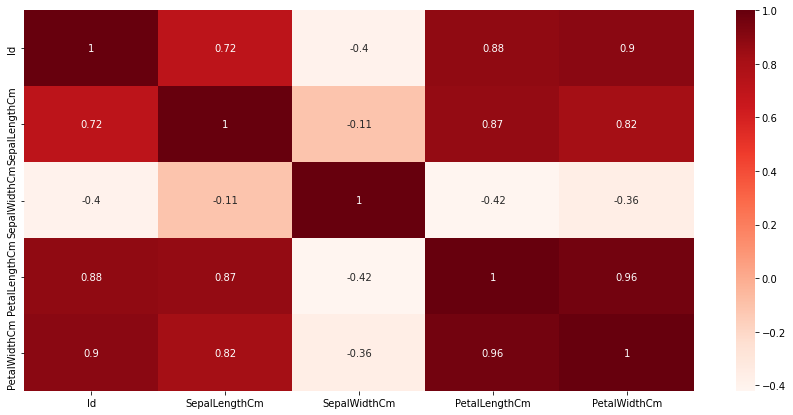

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(iris.corr(), annot=True, cmap='Reds')

Observations:

1) Correlation between Petal Length and Petal Width is 0.96, which indicates they are strongly positively correlated.

2) Correlation between Sepal Length and Sepal Width is -0.11, which indicates they are weakly negatively correlated.

3) Also notice that the correlation coefficients along the diagonal of the table are all equal to 1 because each variable is perfectly correlated with itself. 


### Dropping the 'Id' column before splitting the DataFrame into Train and Test data

In [ ]:
iris.drop(['Id'], inplace=True, axis=1)

In [ ]:
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Splitting the iris DataFrame into Train(80%) and Test data(20%)

In [ ]:
train, test = train_test_split(iris, test_size=0.2)

In [ ]:
train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
30,4.8,3.1,1.6,0.2,Iris-setosa
0,5.1,3.5,1.4,0.2,Iris-setosa
137,6.4,3.1,5.5,1.8,Iris-virginica
37,4.9,3.1,1.5,0.1,Iris-setosa
144,6.7,3.3,5.7,2.5,Iris-virginica
...,...,...,...,...,...
96,5.7,2.9,4.2,1.3,Iris-versicolor
80,5.5,2.4,3.8,1.1,Iris-versicolor
10,5.4,3.7,1.5,0.2,Iris-setosa
55,5.7,2.8,4.5,1.3,Iris-versicolor


In [ ]:
train.shape, test.shape

((120, 5), (30, 5))

In [ ]:
iris.keys()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Splitting the Train data further into Train_x and Train_y and same for Test data as well

In [ ]:
train_x = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
train_y = train['Species']

test_x = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test['Species']

### Building the Decision Tree Model with Train and Test Data

In [ ]:
DTree = DecisionTreeClassifier()
DTree.fit(train_x, train_y)

DecisionTreeClassifier()

### Predicting test_y values from test_x data

In [ ]:
prediction = DTree.predict(test_x)
prediction

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa'],
      dtype=object)

### Calculating the Accuracy of the Decision Tree in predicting the test_y values

In [ ]:
print("Accuracy of the Decision tree is: ", metrics.accuracy_score(prediction, test_y))

Accuracy of the Decision tree is:  0.9666666666666667


### Visualizing the Decision Tree Model

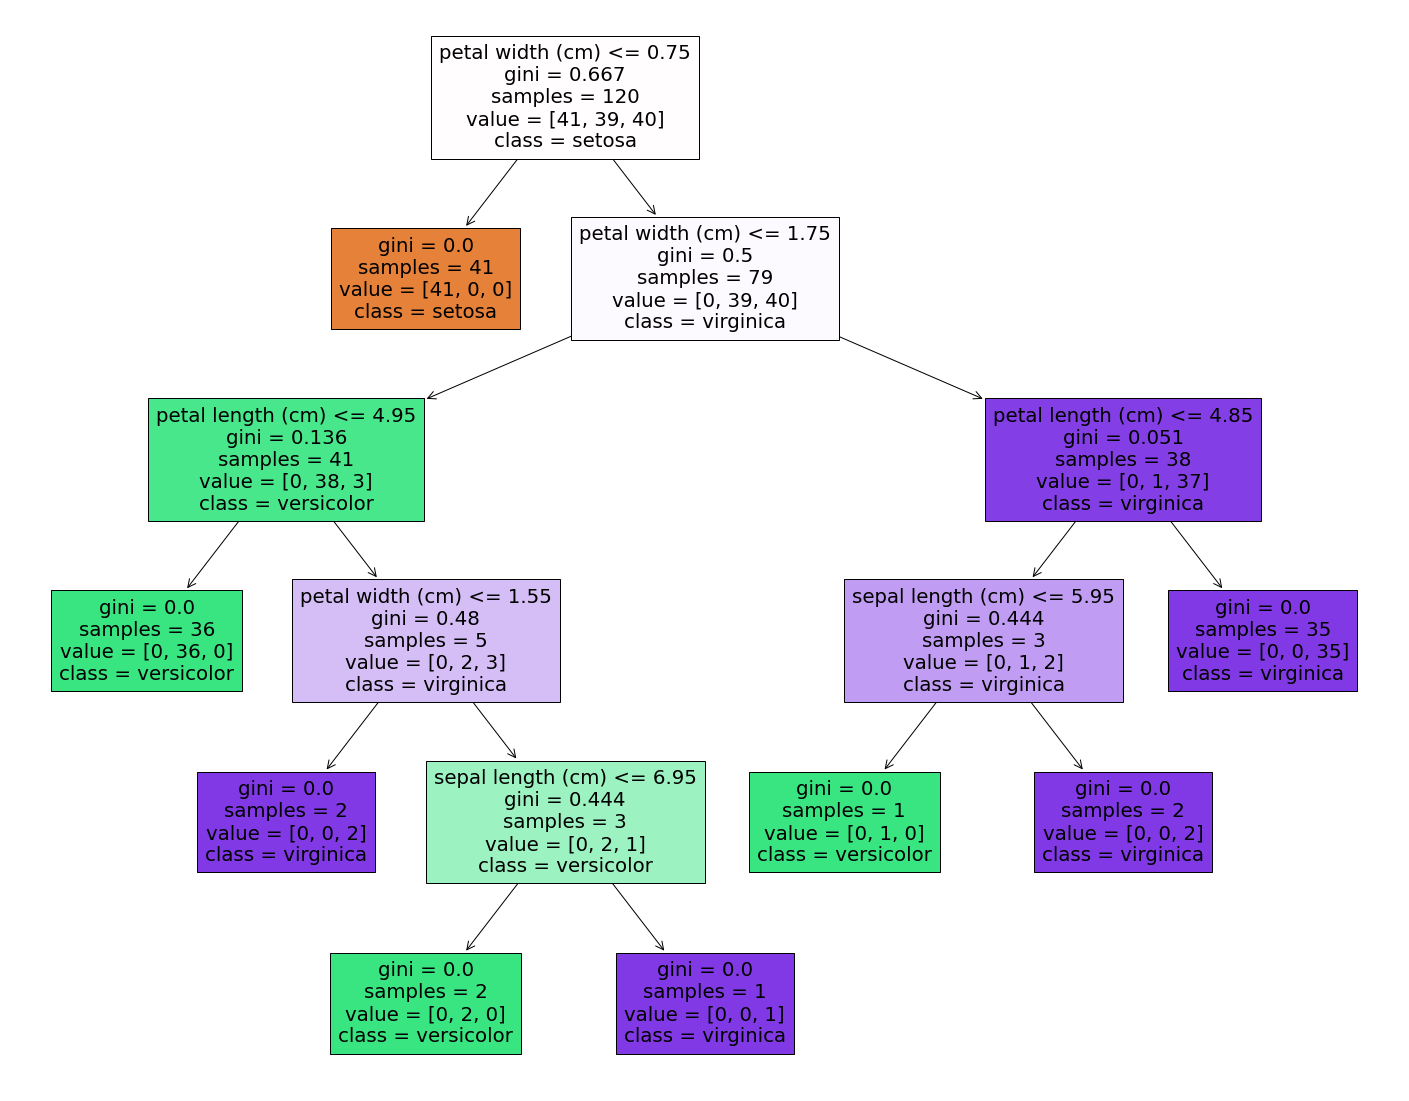

In [ ]:
fig = plt.figure(figsize=(25,20))
fn=['sepal length (cm)','sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
cn = ['setosa','versicolor','virginica']
tree.plot_tree(DTree,
              feature_names = fn,
              class_names=cn,
              filled=True);
fig.savefig('Tree.png')

### Predicting the model

In [ ]:
y_pred= DTree.predict(test_x)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa']


### Checking the metrics - Accuracy score, Confusion matrix and Classification report 

In [ ]:
#Checking the accuracy
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [ ]:
accuracy_score(test_y,y_pred)

0.9666666666666667

Accuracy score is 0.966

Confusion Matrix is defined as a technique to calculate the performance of classification. Also used to predict or summarize the result of classification problem.

In [ ]:
confusion_matrix(test_y,y_pred)

array([[ 9,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  9]])

Observations: 

Columns are Predictions and Rows are Actual results. Diagonal values indicate correct predictions. 9 iris-setosa predictions, 11 iris-virginica predictions and 9 iris-versicolor predictions are correct. 1 iris-virginica prediction is incorrect

A classification report is a metric that allows us to see if our machine learning program is effective or not, and it does this through telling us the precision or accuracy of how the program predicts positives correctly and negatives correctly, as well as just the general prediction ability of positives and negatives overall.

In [ ]:
print(classification_report(test_y,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



Observations:

So we can see in the above results that there was a precision of 1.00 for identifying Iris-setosa, 0.92 for identifying Iris-versicolor and 1.00 for identifying Iris-virginica.

Both unweighted overall accuracy and weighted overall accuracy are 0.97.

Recall is the ability of a machine learning to identify a true positive. Recall score is 1 for both Iris-setosa and Iris-versicolor, which means the program identifies all positives correctly.

The f1 score is the calculated by the following formula, F1 = 2 * (precision * recall) / (precision + recall). It can be interpreted as a weighted average of the precision and recall. f1 score for Iris-setosa is 1, which is the best score.

The support is the number of data samples used in the report. There are 30 total data points, 9 belongs to Iris-setosa, 11 belongs to Iris-versicolor and 10 belongs to Iris-virginica.


### Example

In [ ]:
#Testing our model
sepal_length = 5.1  
sepal_width = 3.5
petal_length = 1.4
petal_width = 0.2

In [ ]:
inputs = np.array([sepal_length,sepal_width,petal_length,petal_width]).reshape(1,4)
inputs

array([[5.1, 3.5, 1.4, 0.2]])

In [ ]:
prediction = DTree.predict(inputs)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
prediction

array(['Iris-setosa'], dtype=object)

In [ ]:
print('For the provided input values, model predicts ' + prediction + ' Species')

['For the provided input values, model predicts Iris-setosa Species']
